hello

$$ y = ax^2 + bx + c $$
$$ x^2 + y^2 = a $$

## ローパスフィルタ

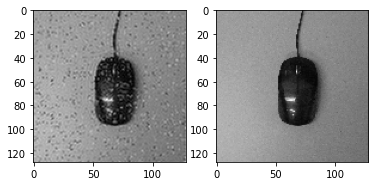

22.731333085410824
25.133078314556606
2.4017452291457815


In [100]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("1121/mouse_original.bmp", 0)
noise = cv2.imread("1121/mouse_noise.bmp", 0)

dft = cv2.dft(np.float32(noise), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = noise.shape
crow, ccol = rows // 2 , cols // 2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-45 : crow+45, ccol-45 : ccol+45] = 1

# apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 0~255で正規化
img_back_max = img_back.max()
img_back2 = (img_back * 255) / img_back_max
img_back2 = img_back2.astype(np.uint8)

# cv2.imwrite("img_back.bmp", img_back2)

# 画像をプロット
plt.subplot(121).imshow(img_back2, cmap="gray")
plt.subplot(122).imshow(img, cmap="gray")
plt.show()

noise_psnr = cv2.PSNR(img, noise)
imp_psnr = cv2.PSNR(img, img_back2)
print(noise_psnr)
print(imp_psnr)
print(imp_psnr-noise_psnr)

## ガウシアンフィルタ

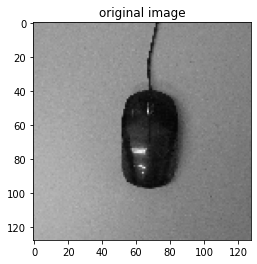

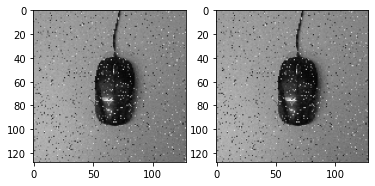

ksize= (1, 1)
22.731333085410824
22.731333085410824
0.0


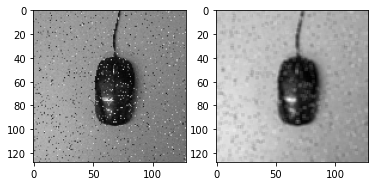

ksize= (3, 3)
22.731333085410824
27.963489010997932
5.232155925587108


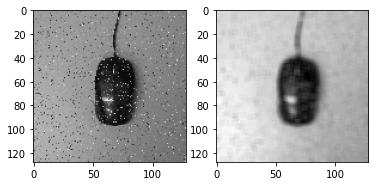

ksize= (5, 5)
22.731333085410824
27.547701124437314
4.816368039026489


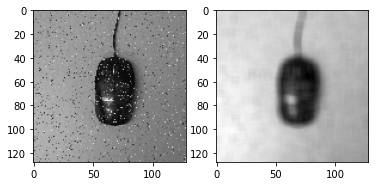

ksize= (7, 7)
22.731333085410824
26.70280150566871
3.971468420257885


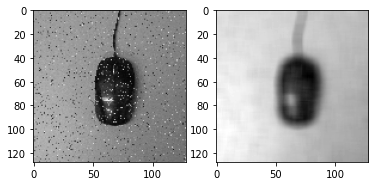

ksize= (9, 9)
22.731333085410824
25.964765447107084
3.2334323616962592


In [101]:
import cv2
import matplotlib.pyplot as plt

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("1121/mouse_noise.bmp", 0)
org = cv2.imread("1121/mouse_original.bmp", 0)

plt.imshow(org, cmap="gray"), plt.title("original image")
plt.show()

mean,stddev = cv2.meanStdDev(noise)

for i in range(1, 10, 2):
  # 
  dst = cv2.GaussianBlur(noise, ksize=(i, i), sigmaX = int(stddev))

  # 画像をプロット
  plt.subplot(121).imshow(noise, cmap="gray")
  plt.subplot(122).imshow(dst, cmap="gray")
  plt.show()

  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, dst)
  print("ksize=", (i, i))
  print(noise_psnr)
  print(imp_psnr)
  print(imp_psnr-noise_psnr)


## メディアンフィルタ

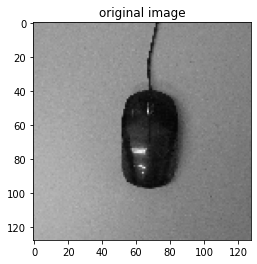

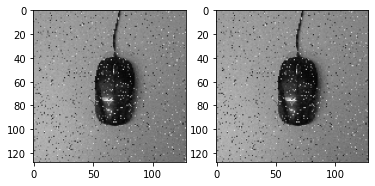

ksize= (1, 1)
22.731333085410824
22.731333085410824
0.0


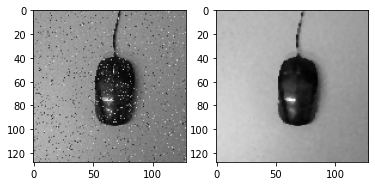

ksize= (3, 3)
22.731333085410824
31.463799529055315
8.73246644364449


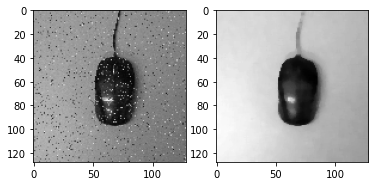

ksize= (5, 5)
22.731333085410824
29.345148797193346
6.613815711782522


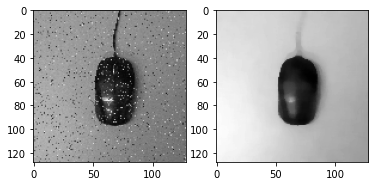

ksize= (7, 7)
22.731333085410824
28.038522659521945
5.307189574111121


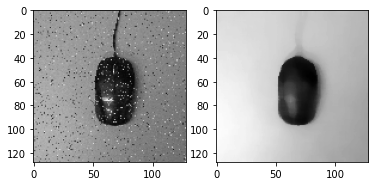

ksize= (9, 9)
22.731333085410824
27.268637363061742
4.537304277650918


In [102]:
import cv2
import matplotlib.pyplot as plt

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("1121/mouse_noise.bmp", 0)
org = cv2.imread("1121/mouse_original.bmp", 0)

plt.imshow(org, cmap="gray"), plt.title("original image")
plt.show()

for i in range(1, 10, 2):
  dst = cv2.medianBlur(noise, i)

  # 画像をプロット
  plt.subplot(121).imshow(noise, cmap="gray")
  plt.subplot(122).imshow(dst, cmap="gray")
  plt.show()

  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, dst)

  print("ksize=", (i, i))
  print(noise_psnr)
  print(imp_psnr)
  print(imp_psnr-noise_psnr)


## オープニング

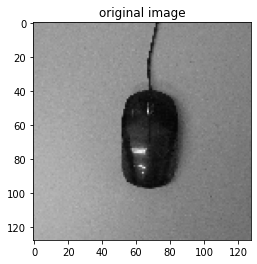

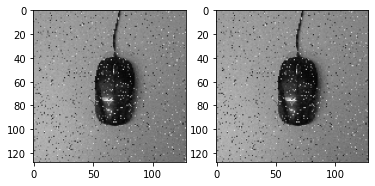

ksize= (1, 1)
22.731333085410824
22.731333085410824
0.0


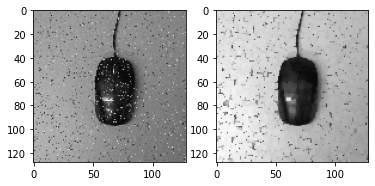

ksize= (3, 3)
22.731333085410824
23.421689622196013
0.6903565367851883


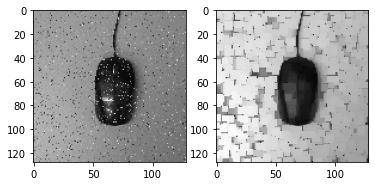

ksize= (5, 5)
22.731333085410824
20.419955074369398
-2.311378011041427


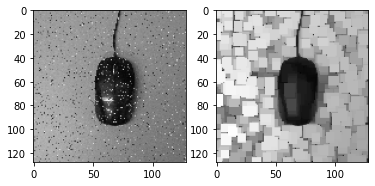

ksize= (7, 7)
22.731333085410824
17.3947433965467
-5.336589688864123


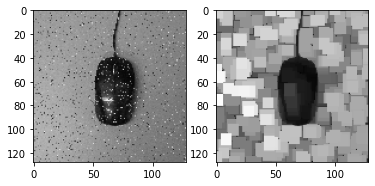

ksize= (9, 9)
22.731333085410824
14.900553882007742
-7.8307792034030825


In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("1121/mouse_noise.bmp", 0)
org = cv2.imread("1121/mouse_original.bmp", 0)

plt.imshow(org, cmap="gray"), plt.title("original image")
plt.show()

for i in range(1, 10, 2):
  kernel = np.ones((i,i),np.uint8)
  opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)

  # 画像をプロット
  plt.subplot(121).imshow(noise, cmap="gray")
  plt.subplot(122).imshow(opening, cmap="gray")
  plt.show()
  noise_psnr = cv2.PSNR(org, noise)
  imp_psnr = cv2.PSNR(org, opening)
  print("ksize=", (i, i))
  print(noise_psnr)
  print(imp_psnr)
  print(imp_psnr-noise_psnr)

## ローパスフィルタの自作関数

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def lowpassFilter(img, msize=30):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)
  return img_back2

## ローパスフィルタ + メディアンフィルタ

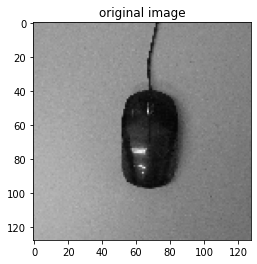

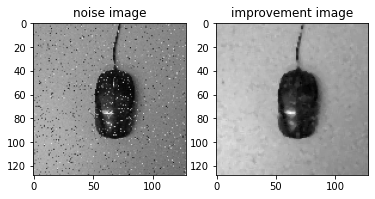

22.731333085410824
29.888948401058173
7.157615315647348


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def low_pass_filter(img, msize=45):
  dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  rows, cols = img.shape
  crow, ccol = rows // 2 , cols // 2

  # create a mask first, center square is 1, remaining all zeros
  mask = np.zeros((rows, cols, 2), np.uint8)
  mask[crow-msize : crow+msize, ccol-msize : ccol+msize] = 1

  # apply mask and inverse DFT
  fshift = dft_shift * mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

  # 0~255で正規化
  img_back_max = img_back.max()
  img_back2 = (img_back * 255) / img_back_max
  img_back2 = img_back2.astype(np.uint8)
  return img_back2


# load image (grayscale)
# 入力画像を読み込み
noise = cv2.imread("1121/mouse_noise.bmp", 0)
org = cv2.imread("1121/mouse_original.bmp", 0)

plt.imshow(org, cmap="gray"), plt.title("original image")
plt.show()

dst1 = low_pass_filter(noise, 55)

dst2 = cv2.medianBlur(dst1, 3)

# 画像をプロット
plt.subplot(121).imshow(noise, cmap="gray"), plt.title("noise image")
plt.subplot(122).imshow(dst2, cmap="gray"), plt.title("improvement image")
plt.show()
noise_psnr = cv2.PSNR(org, noise)
imp_psnr = cv2.PSNR(org, dst2)
print(noise_psnr)
print(imp_psnr)
print(imp_psnr-noise_psnr)